In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Social Demographic Group

In [9]:
# Import the dataset
Social_dataset_path= "C:/Users/Richie MOUHOUADI/Documents/DSTI/ML with Python/Mental_Health_State_Prediction/Data/Clean_Data/Social_group.csv"
target_path = "C:/Users/Richie MOUHOUADI/Documents/DSTI/ML with Python/Mental_Health_State_Prediction/Data/Clean_Data/target_column.csv"

Social = pd.read_csv(Social_dataset_path, sep=",", index_col=False)
target = pd.read_csv(target_path, index_col = False)
display (Social.head())
target.head()


,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO


,Unnamed: 0,Mental Illness
0,0,YES
1,1,YES
2,2,YES
3,3,YES
4,4,YES


In [10]:
# new social group dataset (I add the target)
new_soc_grp = Social.copy()
new_soc_grp["Mental Illness"] = target["Mental Illness"].values
new_soc_grp.head()

,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Mental Illness
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO,YES
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO,YES


In [11]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

In [12]:
#analysis Program Category column

for col in new_soc_grp.columns[0:-1]:
    freq, rel = frequency_table(new_soc_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Living Situation  INSTITUTIONAL SETTING  OTHER LIVING SITUATION  \
Mental Illness                                                    
NO                                   12                     754   
YES                                1361                   31068   
All                                1373                   31822   

Living Situation  PRIVATE RESIDENCE  UNKNOWN     All  
Mental Illness                                        
NO                             4597      214    5577  
YES                          148238     7873  188540  
All                          152835     8087  194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITATES WITH OTHERS  LIVES ALONE  NOT APPLICABLE  \
Mental Illness                                                                
NO                                        3979          684             795   
YES        

In [13]:
# Functions defintion

# Living Situation
def aggregate_living_situation(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Living Situation'].replace({
                                            'PRIVATE RESIDENCE': 'PRIVATE RESIDENCE',
                                            'OTHER LIVING SITUATION': 'OTHER',
                                            'INSTITUTIONAL SETTING': 'INSTITUTIONAL/UNKNOWN',
                                            'UNKNOWN': 'INSTITUTIONAL/UNKNOWN'
                                        })

# Houshold Composition
def aggregate_household_composition(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Household Composition'].replace({
                                            'COHABITATES WITH OTHERS': 'COHABITANTS',
                                            'LIVES ALONE': 'LIVES ALONE',
                                            'NOT APPLICABLE': 'NOT APPLICABLE/UNKOWN',
                                            'UNKNOWN': 'NOT APPLICABLE/UNKOWN'
                                        })

# Employment Status
def aggregate_employment_status(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Employment Status'].replace({
                                        'EMPLOYED': 'EMPLOYED',
                                        'NON-PAID/VOLUNTEER': 'UNEMPLOYED/UNKNOW',
                                        'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'NOT IN LABOR FORCE',
                                        'UNEMPLOYED, LOOKING FOR WORK': 'UNEMPLOYED/UNKNOW',
                                        'UNKNOWN EMPLOYMENT STATUS': 'UNEMPLOYED/UNKNOW'
                                    })

# Number Of Hours Worked Each Week
def aggregate_weekly_working_hours(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Number Of Hours Worked Each Week'].replace({
                                    '01-14 HOURS': 'LOW/UNKNOWN',
                                    '15-34 HOURS': 'AVERAGE OR MORE',
                                    '35 HOURS OR MORE': 'AVERAGE OR MORE',
                                    'NOT APPLICABLE': 'NOT APPLICABLE',
                                    'UNKNOWN EMPLOYMENT HOURS': 'LOW/UNKNOWN'
                                })

# Education Status
def aggregate_education_status(df):
    "This function aggregates the initial 7 categories into 4"
    return df['Education Status'].replace({
                                            'COLLEGE OR GRADUATE DEGREE': 'HIGHLY EDUCATED',
                                            'MIDDLE SCHOOL TO HIGH SCHOOL': 'MEDIUM EDUCATED',
                                            'NO FORMAL EDUCATION': 'OTHERS/UNKNOWN',
                                            'OTHER': 'OTHERS/UNKNOWN',
                                            'PRE-K TO FIFTH GRADE': 'LOW EDUCATED',
                                            'SOME COLLEGE': 'HIGHLY EDUCATED',
                                            'UNKNOWN': 'OTHERS/UNKNOWN'
                                        })

# Special Education Services
def aggregate_special_education_services(df):
    "This function improves the interpretability"
    return df['Special Education Services'].replace({
                                            'NO': 'NO',
                                            'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                                            'UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Criminal Justice Status
def aggregate_criminal_justice_status(df):
    "This function aggregates the initial 3 categories into 2"
    return df['Criminal Justice Status'].replace({
                                'NO': 'NO',
                                'UNKNOWN': 'UNKNOWN',
                                'YES': 'YES'
                            })

# SSI Cash Assistance
def aggregate_SSI_cash_assistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSI Cash Assistance'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# SSDI Cash Assistance
def aggregate_SSDI_cash_ssistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSDI Cash Assistance'].replace({
                                                'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                            })

# Veterans Disability Benefits 
def aggregate_veterans_disability_benefits(df):

    return df['Veterans Disability Benefits'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Veterans Cash Assistance 
def aggregate_veterans_cash_assistance(df):

    return df['Veterans Cash Assistance'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Public Assistance Cash Program
def aggregate_public_assistance_cash_program(df):

    return df['Public Assistance Cash Program'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Other Cash Benefits
def aggregate_other_cash_benefits(df):

    return df['Other Cash Benefits'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })


In [14]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Living Situation'] = aggregate_living_situation(df)
    df['Household Composition'] = aggregate_household_composition(df)
    df['Employment Status'] = aggregate_employment_status(df)
    df['Number Of Hours Worked Each Week'] = aggregate_weekly_working_hours(df)
    df['Education Status'] = aggregate_education_status(df)
    df['Special Education Services'] = aggregate_special_education_services(df)
    df['Criminal Justice Status'] = aggregate_criminal_justice_status(df)
    df['SSI Cash Assistance'] = aggregate_SSI_cash_assistance(df)
    df['SSDI Cash Assistance'] = aggregate_SSDI_cash_ssistance(df)
    df['Veterans Disability Benefits'] = aggregate_veterans_disability_benefits(df)
    df['Veterans Cash Assistance'] = aggregate_veterans_cash_assistance(df)
    df['Public Assistance Cash Program'] = aggregate_public_assistance_cash_program(df)
    df['Other Cash Benefits'] = aggregate_other_cash_benefits(df)
    return df

In [15]:

# Apply to Social dataset
Social_cat_agg = apply_all_aggregations(new_soc_grp)

# check unique values after aggregation
for col in Social_cat_agg.columns:
    print(f"{col} → {Social_cat_agg[col].unique()}")

Living Situation → ['PRIVATE RESIDENCE' 'OTHER' 'INSTITUTIONAL/UNKNOWN']
Household Composition → ['COHABITANTS' 'LIVES ALONE' 'NOT APPLICABLE/UNKOWN']
Employment Status → ['EMPLOYED' 'NOT IN LABOR FORCE' 'UNEMPLOYED/UNKNOW']
Number Of Hours Worked Each Week → ['LOW/UNKNOWN' 'AVERAGE OR MORE' 'NOT APPLICABLE']
Education Status → ['HIGHLY EDUCATED' 'MEDIUM EDUCATED' 'OTHERS/UNKNOWN' 'LOW EDUCATED']
Special Education Services → ['NOT APPLICABLE/UNKNOWN' 'YES' 'NO']
Criminal Justice Status → ['NO' 'YES' 'UNKNOWN']
SSI Cash Assistance → ['NO' 'YES' 'UNKNOWN']
SSDI Cash Assistance → ['NO' 'YES' 'UNKNOWN']
Veterans Disability Benefits → ['NO' 'UNKNOWN' 'YES']
Veterans Cash Assistance → ['NO' 'UNKNOWN' 'YES']
Public Assistance Cash Program → ['NO' 'YES' 'UNKNOWN']
Other Cash Benefits → ['NO' 'YES' 'UNKNOWN']
Mental Illness → ['YES' 'NO']


In [16]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Social_cat_agg.columns[0:-1]:
    freq, rel = frequency_table(Social_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Living Situation  INSTITUTIONAL/UNKNOWN  OTHER  PRIVATE RESIDENCE     All
Mental Illness                                                           
NO                                  226    754               4597    5577
YES                                9234  31068             148238  188540
All                                9460  31822             152835  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITANTS  LIVES ALONE  NOT APPLICABLE/UNKOWN     All
Mental Illness                                                                
NO                            3979          684                    914    5577
YES                         107205        38490                  42845  188540
All                         111184        39174                  43759  194117
------------------------------------------------------------------------------------------


T

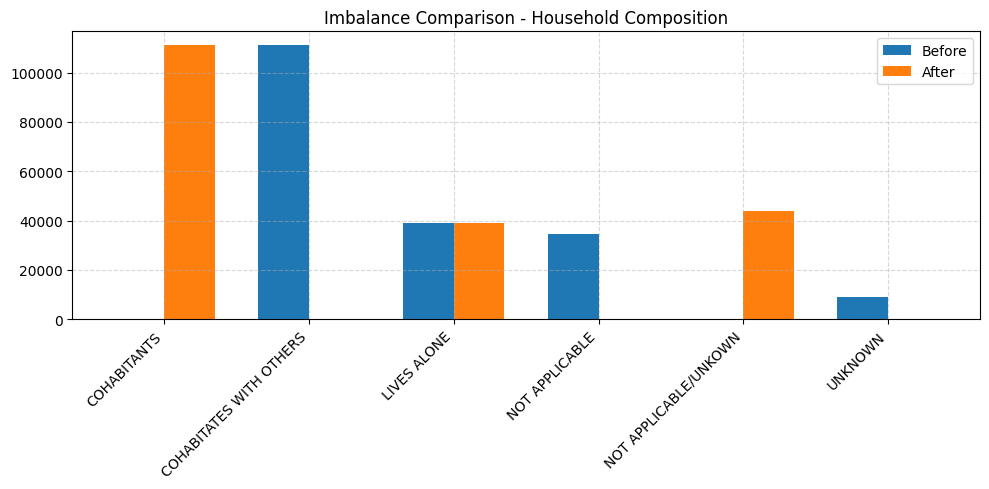

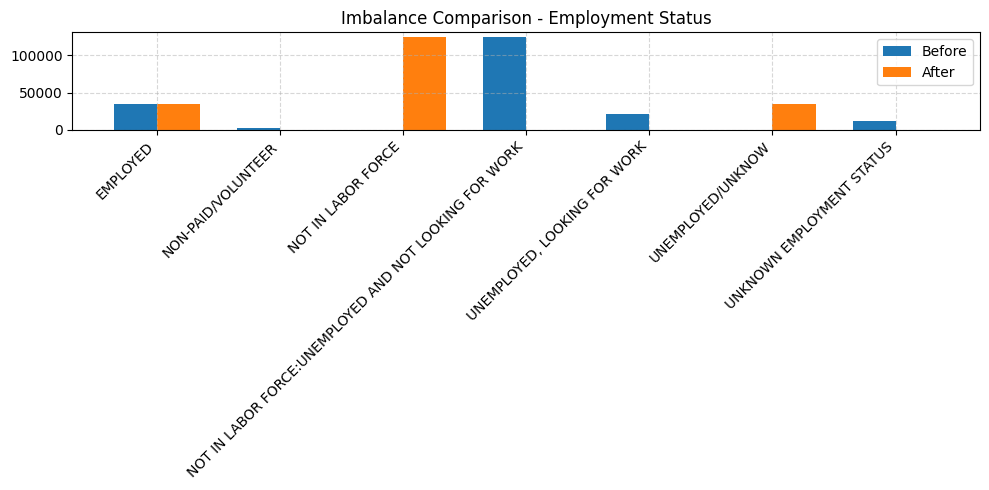

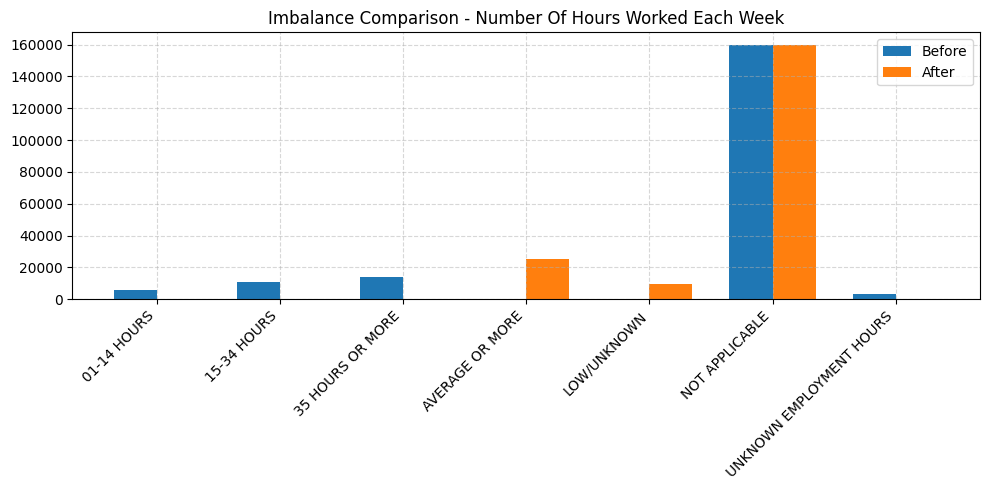

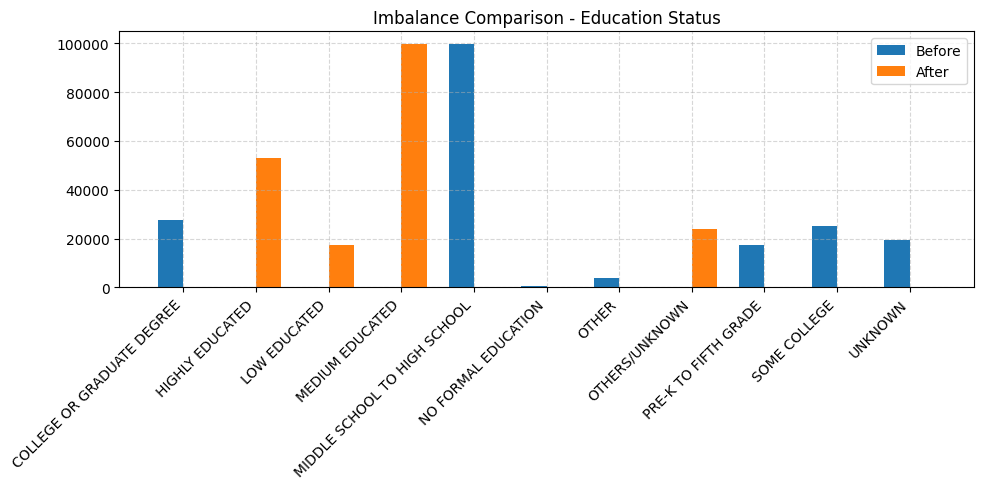

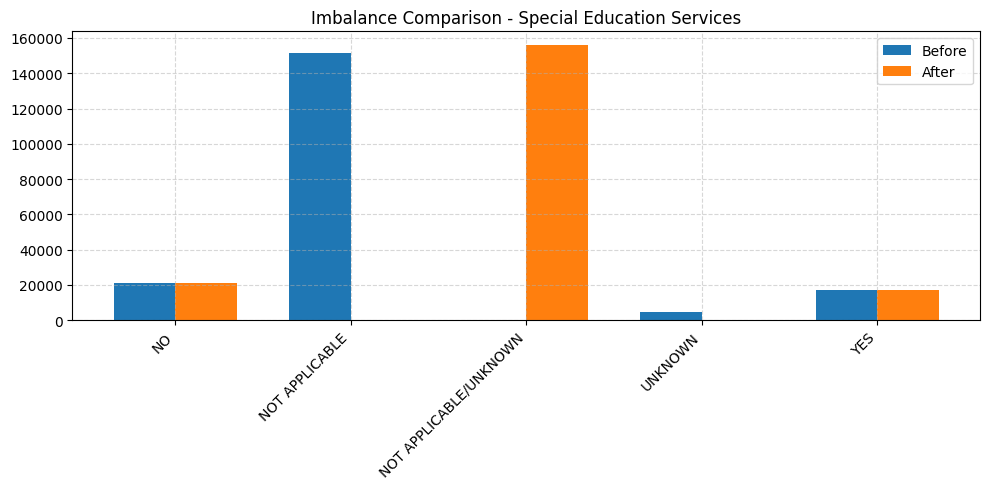

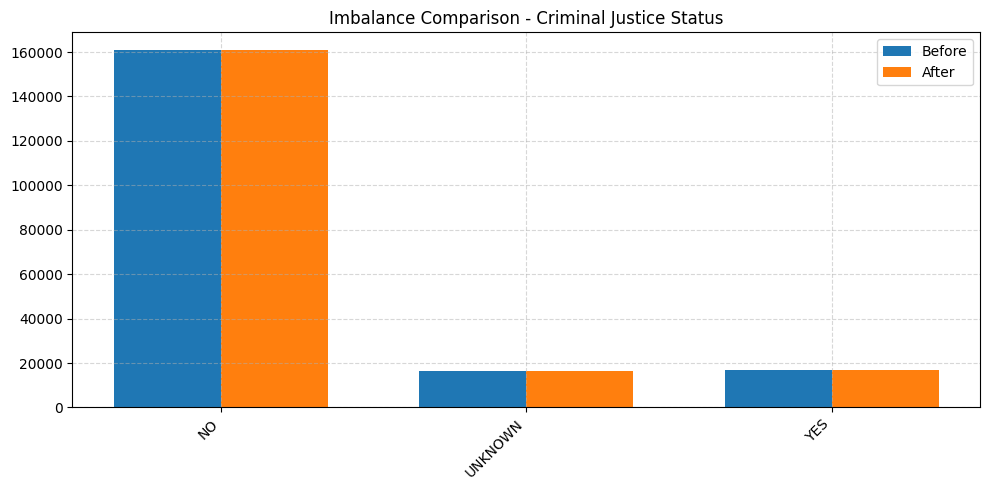

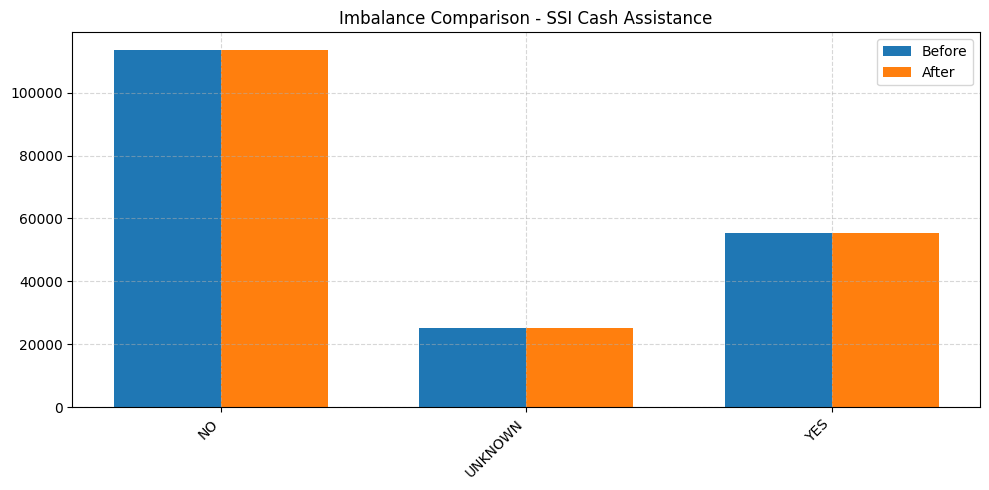

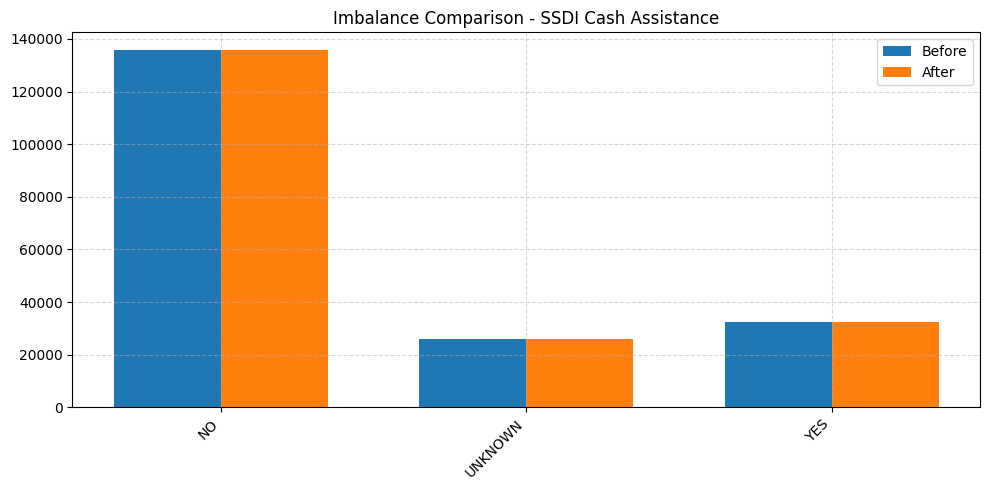

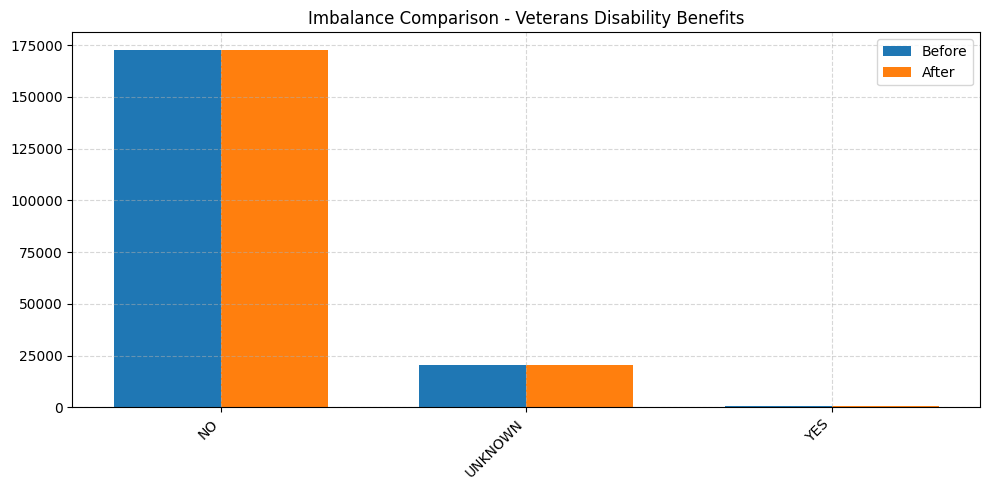

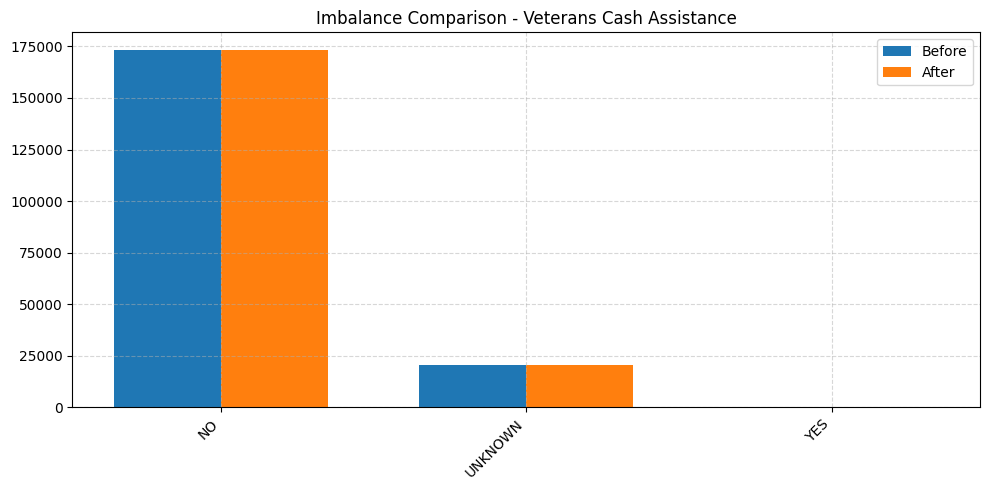

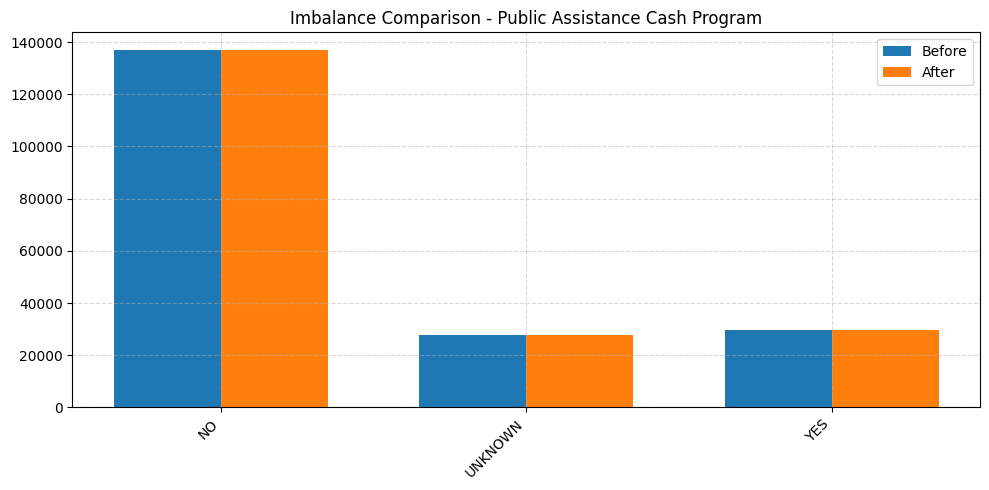

In [17]:
# Using Matplotlib

# Example list of columns you want to compare
'''columns_to_compare = [
    'Living Situation', 'Household Composition', 'Employment Status', 'Number Of Hours Worked Each Week', 'Education Status', 'Special Education Services',
    'Criminal Justice Status', 'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
    'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits'
]'''

columns_to_compare = new_soc_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_soc_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [18]:
#Using Plotly

for col in columns_to_compare:
    original_counts = new_soc_grp[col].value_counts().sort_index()
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis_tickangle=-45,
        xaxis_title=col,
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()

In [19]:

# Apply grouping functions to create new columns
Social_cat_agg_feat_merg = Social_cat_agg.copy()


# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Living Situation'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


def education_group(row):
    education_status = row['Education Status']
    
    if education_status in ['HIGHLY EDUCATED', 'MEDIUM EDUCATED']:
        return 'Educated'
    elif education_status =='LOW EDUCATED':
        return 'Low Educated'
    else:
        return 'Others/Unknown'

def criminal_justice_group(row):
    criminal_status = row['Criminal Justice Status']
    
    if criminal_status == 'YES':
        return 'Involved'
    else:
        return 'Not Involved/Unknown'
    
# Function to aggregate multiple cash assistance related columns into one summary column
def cash_assistance_group(row):
    cash_cols = [
        'SSI Cash Assistance',
        'SSDI Cash Assistance',
        'Veterans Disability Benefits',
        'Veterans Cash Assistance',
        'Public Assistance Cash Program',
        'Other Cash Benefits'
    ]
    # If any cash assistance column is 'YES', then overall is 'Receiving Cash Assistance'
    for col in cash_cols:
        if col in row and row[col] == 'YES':
            return 'Receiving Cash Assistance'
    return 'No/Unknown'

# Assuming your aggregated social DataFrame is named Social_cat_agg_feat_merg

# Add the new Cash Assistance Situation column:
Social_cat_agg_feat_merg['Cash Assistance Situation'] = Social_cat_agg_feat_merg.apply(cash_assistance_group, axis=1)

# Optional: Drop the original cash assistance columns if no longer needed
cols_to_drop = [
    'Special Education Services',
    'SSI Cash Assistance',
    'SSDI Cash Assistance',
    'Veterans Disability Benefits',
    'Veterans Cash Assistance',
    'Public Assistance Cash Program',
    'Other Cash Benefits'
]

Social_cat_agg_feat_merg.drop(columns=cols_to_drop, inplace=True)


Social_cat_agg_feat_merg['Education Group'] = Social_cat_agg_feat_merg.apply(education_group, axis=1)
Social_cat_agg_feat_merg['Criminal Justice Group'] = Social_cat_agg_feat_merg.apply(criminal_justice_group, axis=1)

# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Education Status', 'Criminal Justice Status'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


,Household Composition,Employment Status,Number Of Hours Worked Each Week,Mental Illness,Cash Assistance Situation,Education Group,Criminal Justice Group
0,COHABITANTS,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
1,LIVES ALONE,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
2,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,No/Unknown,Educated,Not Involved/Unknown
3,NOT APPLICABLE/UNKOWN,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown
4,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown
